In [94]:
# unzipando o arquivo

!unzip creditcard.csv.zip

Archive:  creditcard.csv.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: creditcard.csv          


In [95]:
# importação de bibliotecas e config. de visualização

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


## Visão geral do Dataset

O dataset utilizado é o Credit Card Fraud Detection, contendo transações realizadas
por clientes europeus em setembro de 2013.

Cada linha representa uma transação individual, e as colunas são:

- **Time**:  
  Tempo em segundos desde a primeira transação registrada no dataset.  
  Representa uma informação temporal relativa, e não uma data absoluta.

- **V1 a V28**:  
  Variáveis numéricas resultantes de uma transformação por PCA (Principal Component Analysis),
  aplicada com o objetivo de preservar a privacidade dos usuários.  
  Por esse motivo:
  - O significado original dessas variáveis não é conhecido
  - Elas são aproximadamente descorrelacionadas entre si
  - Apresentam média próxima de zero e variância controlada

- **Amount**:  
  Valor monetário da transação.  
  Essa variável não passou pelo PCA e, portanto, pode apresentar:
  - Assimetria
  - Outliers
  - Escala diferente das demais variáveis

- **Class**:  
  Variável alvo (target):
  - 0 = Transação normal
  - 1 = Transação fraudulenta

O dataset é caracterizado por um desbalanceamento extremo, onde fraudes representam
uma fração muito pequena do total de transações.


In [ ]:
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## ANÁLISE EXPLORATÓRIA

In [ ]:
print('\n INFORMAÇÕES GERAIS, TIPOS E ESTATÍSTICAS DESCRITIVAS')
print(f"Shape: {df.shape}")
print(f"Memória: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n")
df.info()




 INFORMAÇÕES GERAIS, TIPOS E ESTATÍSTICAS DESCRITIVAS
Shape: (284807, 31)
Memória: 67.36 MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  floa

Observa-se que todas as variáveis são numéricas, descartando a necessidade de encoding

In [ ]:
print("\n")
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


A tabela de estatísticas descritivas apresenta medidas fundamentais para compreender o comportamento das variáveis numéricas do dataset:

- **count**:  
  Indica a quantidade de valores não nulos em cada coluna.  
  Observa-se que todas as variáveis possuem o mesmo valor de count, indicando
  **ausência de valores faltantes** no dataset.

- **mean (média)**:  
  Representa o valor médio das observações.  
  As variáveis V1 a V28 apresentam médias próximas de zero, o que é esperado,
  pois são resultado de uma transformação por PCA.  
  A variável Amount apresenta média superior à mediana, sugerindo uma
  **distribuição assimétrica à direita**.

- **std (desvio padrão)**:  
  Mede a dispersão dos dados em torno da média.  
  As variáveis PCA possuem desvios padrão relativamente homogêneos, enquanto
  Amount apresenta maior variabilidade, reforçando a necessidade de normalização.

- **min e max**:  
  Representam os valores mínimo e máximo observados.  
  A presença de valores máximos elevados em Amount indica possíveis outliers.

- **25%, 50% (mediana) e 75%**:  
  Quartis da distribuição.  
  A diferença entre a média e a mediana em Amount reforça a assimetria da variável,
  enquanto as variáveis PCA apresentam distribuições mais centradas.


In [ ]:
# verificar desbalanceamento
print("\n DISTRIBUIÇÃO DE CLASSES")
df['Class'].value_counts(normalize=True) * 100


 DISTRIBUIÇÃO DE CLASSES


,proportion
Class,
0,99.827251
1,0.172749


A análise das classes revela um desbalanceamento extremo no df: A grande maioria das transações pertence à classe 0 (normal), e apenas uma fração muito pequena corresponde à classe 1 (fraude)

Em termos percentuais, as transações fraudulentas representam aproximadamente 0,17% do total.

In [ ]:
# unique values
print("\n VALORES ÚNICOS POR COLUNA")
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} valores únicos")


 VALORES ÚNICOS POR COLUNA
Time: 124592 valores únicos
V1: 275663 valores únicos
V2: 275663 valores únicos
V3: 275663 valores únicos
V4: 275663 valores únicos
V5: 275663 valores únicos
V6: 275663 valores únicos
V7: 275663 valores únicos
V8: 275663 valores únicos
V9: 275663 valores únicos
V10: 275663 valores únicos
V11: 275663 valores únicos
V12: 275663 valores únicos
V13: 275663 valores únicos
V14: 275663 valores únicos
V15: 275663 valores únicos
V16: 275663 valores únicos
V17: 275663 valores únicos
V18: 275663 valores únicos
V19: 275663 valores únicos
V20: 275663 valores únicos
V21: 275663 valores únicos
V22: 275663 valores únicos
V23: 275663 valores únicos
V24: 275663 valores únicos
V25: 275663 valores únicos
V26: 275663 valores únicos
V27: 275663 valores únicos
V28: 275663 valores únicos
Amount: 32767 valores únicos
Class: 2 valores únicos


As variáveis V1 a V28 apresentam um número extremamente alto de valores únicos, próximo ao número total de observações do dataset. Esse comportamento é esperado, uma vez que essas variáveis são o resultado de uma transformação por PCA, gerando atributos contínuos que raramente se repetem exatamente.

A variável Time também apresenta uma alta cardinalidade, indicando que muitas transações ocorrem em instantes de tempo distintos.

Amount tem um número significativamente menor de valores únicos em comparação às variáveis PCA, o que sugere a existência de valores repetidos e talvez possíveis concentrações em determinados montantes de transação.

Por fim, a variável Class apresenta apenas dois valores únicos, correspondentes às classes 0 (normal) e 1 (fraude).

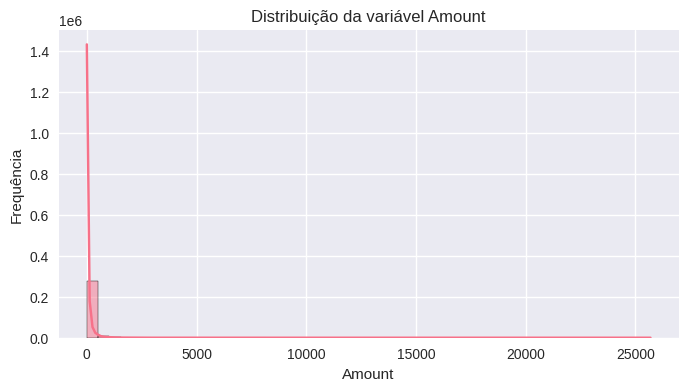

In [ ]:
# Histograma de Amount
plt.figure(figsize=(8, 4))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribuição da variável Amount')
plt.xlabel('Amount')
plt.ylabel('Frequência')
plt.show()

O histograma da variável Amount evidencia uma distribuição fortemente assimétrica
à direita, caracterizada por uma grande concentração de transações de baixo valor
e uma cauda longa associada a valores elevados. Esse comportamento é típico de dados financeiros e justifica a presença de outliers legítimos, que não devem ser tratados como erros de medição no contexto de detecção de fraudes.


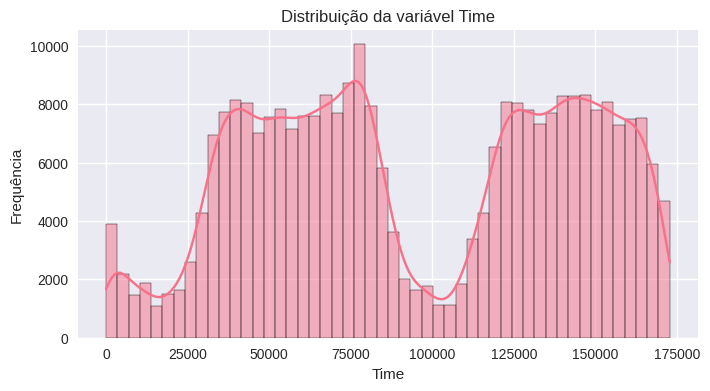

In [ ]:
# Histograma de Time
plt.figure(figsize=(8, 4))
sns.histplot(df['Time'], bins=50, kde=True)
plt.title('Distribuição da variável Time')
plt.xlabel('Time')
plt.ylabel('Frequência')
plt.show()


Em comparação ao Amount, o histograma da variável Time indica uma distribuição mais contínua ao longo
do intervalo temporal considerado, refletindo o caráter sequencial e relativo dessa variável. Porém, há sim certa variação, incluindo uma queda na densidade de transações em torno
de determinado ponto temporal (há aumento, redução e depois novo aumento na frequência). Esse comportamento reflete períodos com menor volume
de transações, possivelmente associados a janelas temporais distintas de coleta ou
a ciclos naturais de atividade ao longo do dia.

Captura a dinâmica temporal real do sistema, não sendo
resultado de erro ou inconsistência nos dados.



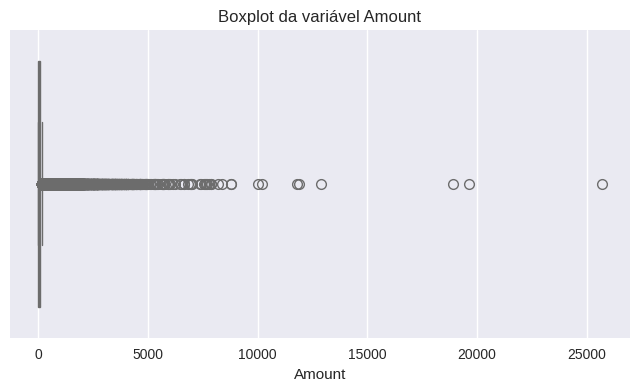

In [ ]:
# OUTLIERS (identificar, não remover)
# Boxplot para identificar outliers na variável Amount
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Amount'])
plt.title('Boxplot da variável Amount')
plt.show()

A análise da variável Amount evidencia a presença de outliers, caracterizados por transações de valor significativamente mais elevado que a maioria dos registros.

No contexto de detecção de fraudes, esses outliers não representam erros de dados, mas sim eventos mais raros e informativos: é sim possível ter transações de valor mais elevado. Dessa forma, não removemos esses valores, preservando informações relevantes para os modelos de detecção de anomalias.

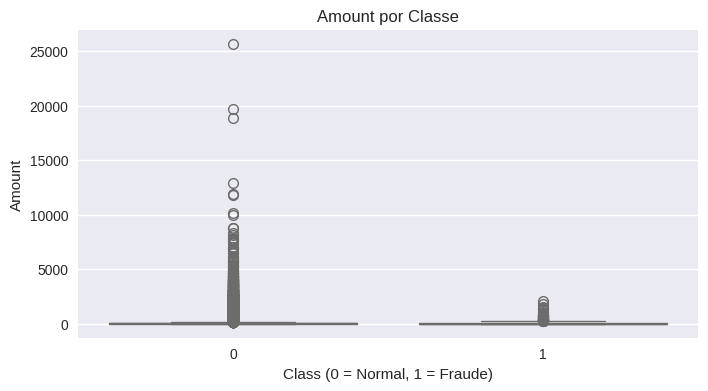

In [ ]:
# Boxplot de Amount por classe
plt.figure(figsize=(8, 4))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Amount por Classe')
plt.xlabel('Class (0 = Normal, 1 = Fraude)')
plt.ylabel('Amount')
plt.show()


Observa-se que transações **normais (Classe 0)** apresentam uma ampla faixa de valores,
incluindo os maiores montantes registrados no conjunto de dados, com diversos outliers
de alto valor. Já as transações **fraudulentas (Classe 1)** concentram-se,
majoritariamente, em valores mais baixos, com menor dispersão e poucos registros de
valores elevados.

Esse comportamento sugere que fraudes não estão necessariamente associadas a
transações de alto valor, mas podem ocorrer com maior frequência em valores moderados
ou baixos, possivelmente como estratégia para evitar detecção.

Text(0.5, 1.0, 'densidade V2 por Classe')

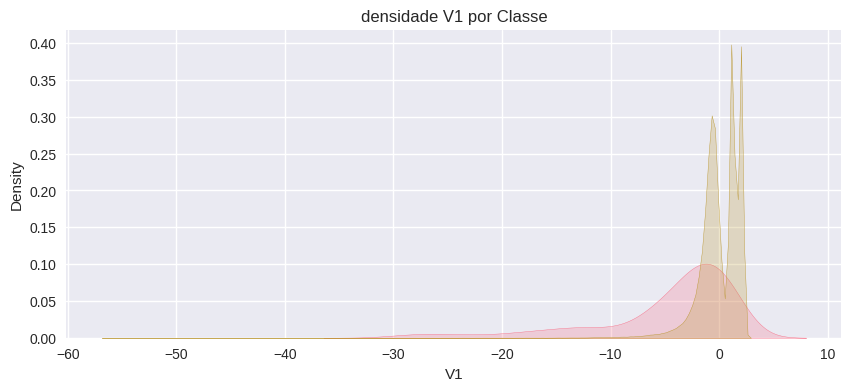

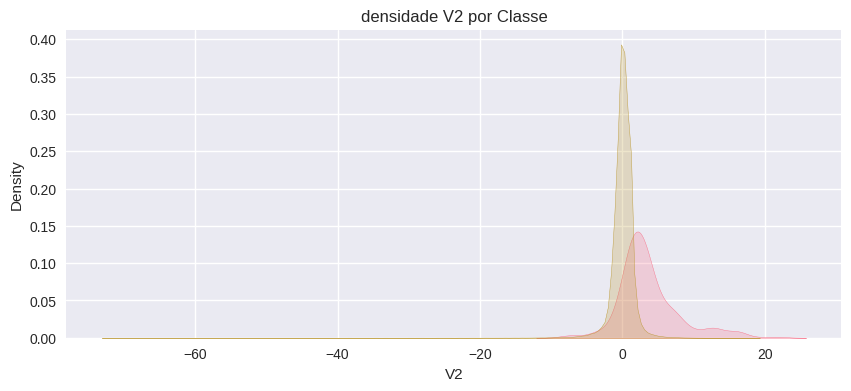

In [ ]:
fraud = df[df['Class']==0]
non_fraud = df[df['Class']==1]
fraud.shape, non_fraud.shape
plt.figure(figsize=(10,4))
sns.kdeplot(non_fraud['V1'], label='Non-Fraud', fill=True)
sns.kdeplot(fraud['V1'], label='Fraud', fill=True)
plt.title('densidade V1 por Classe')
plt.figure(figsize=(10,4))
sns.kdeplot(non_fraud['V2'], label='Non-Fraud', fill=True)
sns.kdeplot(fraud['V2'], label='Fraud', fill=True)
plt.title('densidade V2 por Classe')

In [ ]:
# Boxplot de uma variável PCA por classe
plt.figure(figsize=(8, 4))
sns.boxplot(x='Class', y='V1', data=df)
plt.title('V1 por Classe')
plt.show()
plt.figure(figsize=(8, 4))
sns.boxplot(x='Class', y='V2', data=df)
plt.title('V2 por Classe')
plt.show()

Algumas variáveis PCA apresentam distribuições distintas entre transações normais
e fraudulentas, indicando que padrões latentes capturados pelo PCA podem ser
explorados pelos modelos de detecção de anomalias.
Embora as variáveis V1 a V28 não possuam interpretação semântica direta, a análise
bivariada em relação à variável alvo indica que algumas componentes apresentam
distribuições distintas entre transações normais e fraudulentas. Isso sugere que
padrões latentes capturados pelo PCA podem ser explorados pelos modelos de detecção
de anomalias.

In [ ]:
# TIME X CLASS

plt.figure(figsize=(8, 4))
sns.histplot(df[df['Class'] == 0]['Time'], bins=50, label='Normal', stat='density')
sns.histplot(df[df['Class'] == 1]['Time'], bins=50, label='Fraude', stat='density')
plt.legend()
plt.title('Distribuição de Time por Classe')
plt.show()



A análise da distribuição temporal em função da classe revela que, em determinados
intervalos com menor volume total de transações, como logo após o início ou aproximadamente em Time 100000, observa-se um aumento relativo na densidade de transações
fraudulentas. Isso não indica necessariamente um aumento absoluto
no número de fraudes, mas sim uma maior proporção de fraudes em períodos de menor
atividade geral. Tal padrão pode estar associado a dinâmicas temporais específicas ou a potenciais fragilidades na
segurança em determinados horários, reforçando a importância da análise temporal
para identificação de janelas de maior risco.

Enquanto transações não fraudulentas apresentam uma distribuição mais consistente e regular, refletindo padrões naturais de comportamento dos usuários ao longo do
tempo, as transações fraudulentas mostram-se mais dispersas e irregulares, o que pode sugerir
que a fraude é intencionalmente
distribuída ao longo do tempo para evitar detecção.

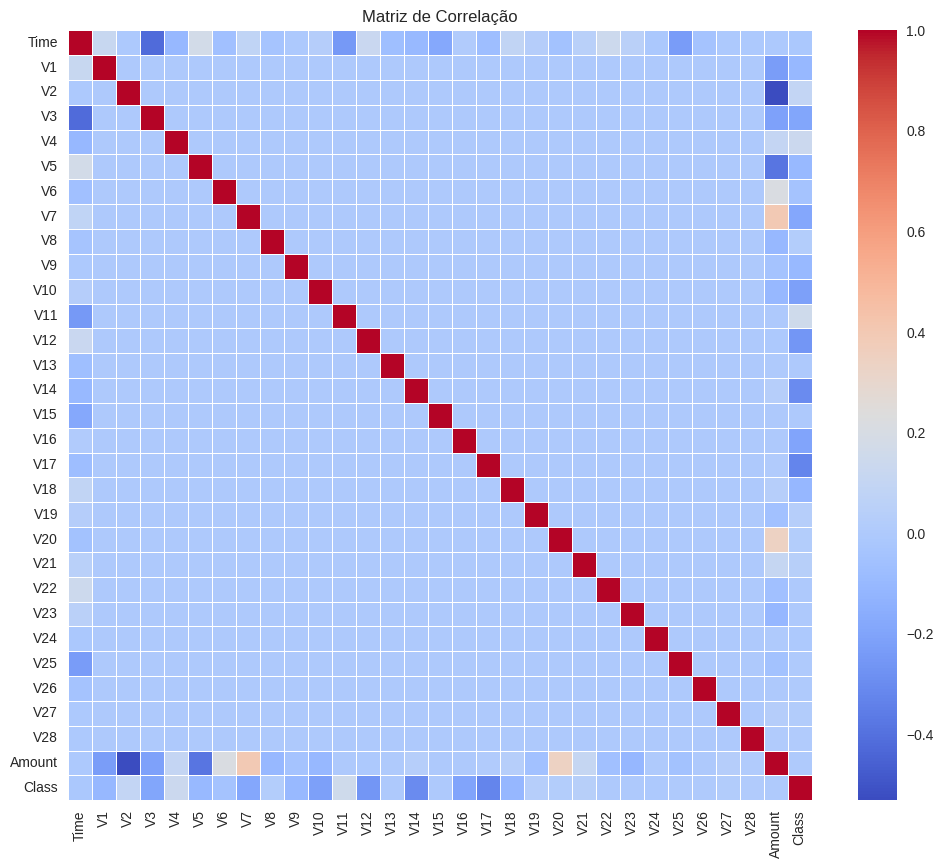

Top 5 variáveis mais correlacionadas com 'Class':
['V17', 'V14', 'V12', 'V10', 'V16']


In [ ]:
# Matriz de correlação (amostragem para eficiência visual)

corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

cor_target = corr['Class'].abs().sort_values(ascending=False)
cor_target = cor_target.drop('Class')
top_features= cor_target.head(5).index.tolist()
print("Top 5 variáveis mais correlacionadas com 'Class':")
print(top_features)


A matriz de correlação indica baixa correlação entre as variáveis V1 a V28,
resultado esperado da aplicação do PCA. As variáveis Amount e Time apresentam
correlações limitadas com as demais, reforçando sua natureza distinta. Não se observa
a presença de pares de variáveis com correlação linear elevada, o que reduz riscos
de multicolinearidade e favorece a aplicação de modelos probabilísticos e baseados
em distância.

Em relação à variável alvo (Class), nota-se que as correlações lineares com as
demais variáveis são, em geral, de baixa magnitude. Esse resultado indica que a
separação entre transações normais e fraudulentas não depende de relações lineares
simples, reforçando a necessidade de modelos capazes de capturar padrões não lineares
e interações multivariadas complexas.
Algumas variáveis, em especial V17/V14/V12,  apresentam correlações negativas mais acentuadas com a classe alvo, sugerindo que essas componentes principais capturam padrões relevantes associados a comportamentos fraudulentos.

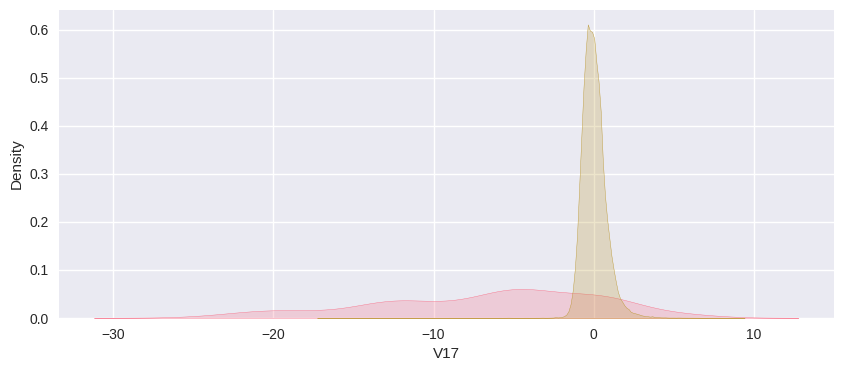

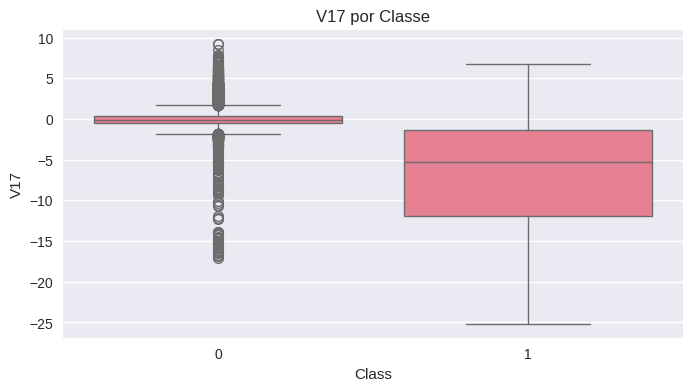

In [96]:
plt.figure(figsize=(10,4))
sns.kdeplot(non_fraud['V17'], label='Non-Fraud', fill=True)
sns.kdeplot(fraud['V17'], label='Fraud', fill=True)
plt.figure(figsize=(8, 4))
sns.boxplot(x='Class', y='V17', data=df)
plt.title('V17 por Classe')
plt.show()

Fazendo agora uma análise univariada especificamente na variável V17:

No gráfico de densidade, nota-se que as transações não fraudulentas
apresentam valores de V17 fortemente concentrados próximos de zero, com baixa
variabilidade e caudas relativamente suaves. Em contrapartida, as transações
fraudulentas mostram um deslocamento da distribuição
para a região negativa, evidenciando
diferenças marcantes no comportamento dessa variável entre as classes.

O boxplot reforça essa observação ao evidenciar uma mediana significativamente mais
baixa para a classe fraudulenta, além de maior variabilidade e presença de valores
extremos negativos. Enquanto a maioria das transações normais permanece próxima de
zero, as fraudes apresentam uma concentração expressiva em valores negativos, com
pouca sobreposição entre as distribuições centrais das duas classes.

Esses resultados indicam que valores negativos de V17 são fortemente associados
a transações fraudulentas, sugerindo que essa variável captura padrões latentes
relevantes para a detecção de fraudes.

Esse padrão se repete nas variáveis mais correlacionadas ao target.

## SPLIT DOS DADOS EM TREINO, VALIDAÇÃO E TESTE

Split HOLDOUT 70-15-15 com estratificação (mantém proporção das classes)

Primeiro split: 70% treino, 30% temporário (val+test)

Segundo split: dividir o temporário em validação (15%) e teste (15%).

In [97]:
# criar um identificador da transação usando o índice como ID.
df = df.copy()
df['id'] = df.index

y = df['Class'] #target

# Features: remover Class e id (id não deve entrar no modelo)
X = df.drop(columns=['Class', 'id'])

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    random_state=42,
    stratify=y_temp
)

print(f"Treino: {X_train.shape[0]} amostras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validação: {X_val.shape[0]} amostras ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Teste: {X_test.shape[0]} amostras ({X_test.shape[0]/len(X)*100:.1f}%)")
print("\nDistribuição do target por conjunto:")
print(f"Treino: {y_train.value_counts(normalize=True).to_dict()}")
print(f"Validação: {y_val.value_counts(normalize=True).to_dict()}")
print(f"Teste: {y_test.value_counts(normalize=True).to_dict()}")

# Separar os IDs do conjunto de teste (para salvar ids_test.csv depois)
ids_test = df.loc[X_test.index, 'id']


Treino: 199364 amostras (70.0%)
Validação: 42721 amostras (15.0%)
Teste: 42722 amostras (15.0%)

Distribuição do target por conjunto:
Treino: {0: 0.9982745129511847, 1: 0.0017254870488152324}
Validação: {0: 0.9982678308092039, 1: 0.0017321691907960957}
Teste: {0: 0.9982678713543374, 1: 0.0017321286456626562}


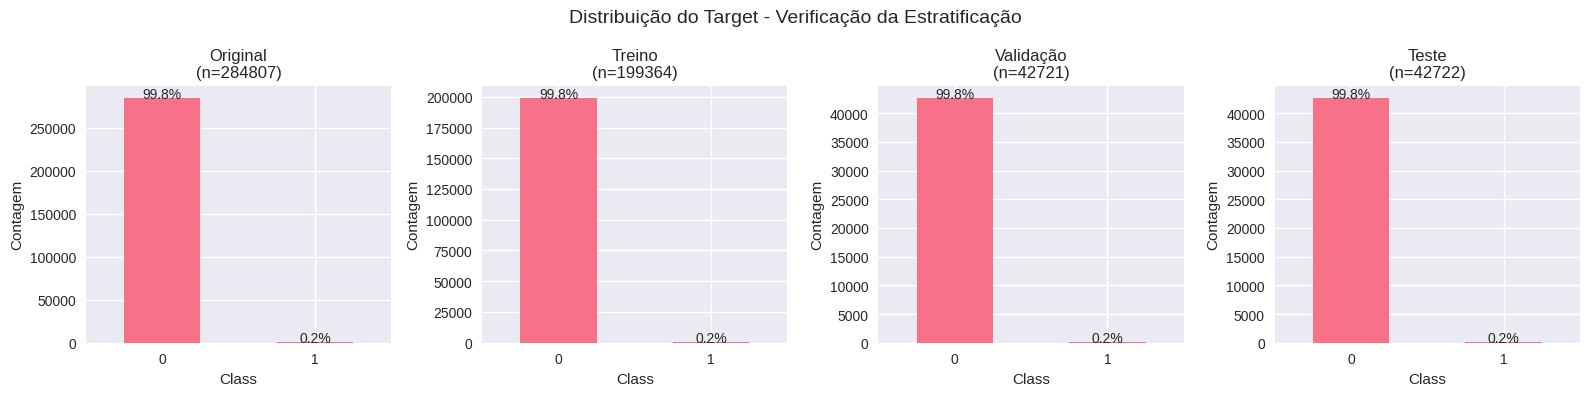

In [98]:
# Visualizar distribuições
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
datasets = [('Original', y), ('Treino', y_train), ('Validação', y_val), ('Teste', y_test)]
for i, (name, data) in enumerate(datasets):
    data.value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{name}\n(n={len(data)})')
    axes[i].set_ylabel('Contagem')
    axes[i].tick_params(axis='x', rotation=0)

    # Adicionar percentuais
    total = len(data)
    for j, v in enumerate(data.value_counts()):
        axes[i].text(j, v + 1, f'{v/total*100:.1f}%', ha='center')
plt.suptitle('Distribuição do Target', fontsize=14)
plt.tight_layout()
plt.show()

## Limpeza

Como já visto, etapas como encoding e tratamento de outliers não são necessários.

In [99]:
# MISSING VALUES
# Verificação de valores faltantes por coluna
missing_values = df.isnull().sum()
missing_values


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


O dataset não possui valores ausentes em nenhuma das colunas.


In [100]:
# DUPLICATAS
num_duplicates = df.duplicated().sum()
num_duplicates


np.int64(0)

A análise de duplicatas revelou que não há registros duplicados no conjunto de dados.


In [101]:
# VALORES IMPOSSÍVEIS / INCONSISTENTES
# Amount: pode até ser zero, não pode ser negativo
# time: nao pode ser negativo
(df['Amount'] < 0).sum()
(df['Time'] < 0).sum()

np.int64(0)

Foram realizadas verificações de consistência em variáveis com interpretação direta.
Não foram identificados valores negativos na variável Amount nem na variável Time.

As variáveis V1 a V28 são resultado de uma transformação por PCA e, portanto,
não possuem interpretação semântica direta que permita a definição de limites
lógicos específicos.


## Escalonamento

In [102]:
X_train.columns
scaler = StandardScaler()
scaler.fit(X_train)     #apenas no conjunto de treino

# Aplicação da normalização
X_train_scaled = scaler.transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(
    X_train_scaled,
    columns=X_train.columns,
    index=X_train.index
)

X_val_scaled = pd.DataFrame(
    X_val_scaled,
    columns=X_val.columns,
    index=X_val.index
)

X_test_scaled = pd.DataFrame(
    X_test_scaled,
    columns=X_test.columns,
    index=X_test.index
)

X_train_scaled.describe().loc[['mean', 'std']] #verificação


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
mean,-1.055671e-16,2.209709e-18,-2.031507e-18,8.607174e-18,4.633262e-18,2.074276e-17,1.821228e-17,-3.884812e-18,-4.811464e-19,-1.090598e-17,5.274790e-18,-2.509089e-17,2.530474e-18,-1.368594e-17,8.910118e-20,7.644882e-18,1.996758e-17,1.696487e-17,1.979828e-17,-6.450926e-18,-6.593488e-18,-8.482433e-18,3.599688e-18,4.134295e-18,-1.147623e-17,-2.106352e-17,2.252478e-17,3.207643e-18,3.777890e-18,1.094163e-17
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00


Após a divisão dos dados em conjuntos de treino, validação e teste, foi aplicado o
escalonamento das variáveis por meio do método de padronização (StandardScaler).
O scaler foi ajustado exclusivamente sobre o conjunto de treino, evitando vazamento
de informação, e posteriormente aplicado aos conjuntos de validação e teste.

A padronização é essencial neste projeto, uma vez que os modelos utilizados são
sensíveis à escala das variáveis, garantindo que nenhuma feature domine as demais
por diferenças de magnitude.


## Output

In [103]:
os.makedirs('data/processed', exist_ok=True)

# Features
X_train_scaled.to_csv('data/processed/X_train_processed.csv', index=False)
X_test_scaled.to_csv('data/processed/X_test_processed.csv', index=False)

# Targets
y_train.to_csv('data/processed/y_train.csv', index=False)
y_test.to_csv('data/processed/y_test.csv', index=False)

# IDs do teste
ids_test.to_csv('data/processed/ids_test.csv', index=False)

os.listdir('data/processed')


['y_test.csv',
 'y_train.csv',
 'X_test_processed.csv',
 'X_train_processed.csv',
 'ids_test.csv']

Ao final do pré-processamento, os conjuntos de dados foram exportados para arquivos
CSV, seguindo o contrato de dados definido no projeto. Os arquivos gerados incluem
as features normalizadas para treino e teste, os respectivos rótulos e os
identificadores das amostras de teste, garantindo compatibilidade com as etapas
posteriores de modelagem e avaliação.


## Features utilizadas e decisões da engenharia de features

As features utilizadas no projeto correspondem às variáveis V1 a V28, que são
componentes principais extraídas previamente por meio de PCA (Principal Component
Analysis), além das variáveis originais Time e Amount. As componentes
principais já sintetizam informações relevantes do conjunto de dados ao capturar
padrões latentes e combinações lineares das variáveis originais.

Dessa forma, optou-se por não realizar uma engenharia de features extensiva, uma
vez que transformações adicionais poderiam introduzir redundância, aumentar a
complexidade do espaço de atributos e elevar o risco de overfitting,
especialmente em um cenário de dados extremamente desbalanceados e com foco em
detecção de anomalias, no qual a classe de interesse é rara. A manutenção da
estrutura original das features também contribui para maior robustez e melhor
alinhamento com os pressupostos dos modelos adotados no projeto.

A variável Time foi mantida no conjunto de dados por representar uma informação
temporal relativa que pode capturar padrões indiretos de comportamento ao longo do
período observado, como variações na proporção de fraudes em determinados intervalos
temporais. Embora não seja suficiente isoladamente para discriminar fraudes, essa
variável fornece informação complementar relevante quando analisada em conjunto com
as demais features.

Quanto à variável Amount, apesar da assimetria observada em sua distribuição,
optou-se por não aplicar transformação logarítmica, uma vez que os modelos
utilizados são capazes de lidar com distribuições assimétricas após a etapa de
normalização. Além disso, preservar a escala original de Amount evita a possível
perda de informação associada a transações de valor elevado, que podem ser
potencialmente informativas no contexto de fraude.

Em conjunto, essas decisões visam preservar a estrutura original dos dados,
minimizar introdução de vieses artificiais e garantir maior interpretabilidade e
robustez nas etapas subsequentes de modelagem e detecção de anomalias.